In [1]:
# Importing necessary libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Importing machine learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# Importing evaluation metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report 
# Importing SMOTE for handling imbalanced datasets
from imblearn.over_sampling import SMOTE

In [30]:
#Loading the dataset into a pandas DataFrame
df = pd.read_csv("creditcard.csv")

In [31]:
# Select a random sample of 100,000 rows
df = df.sample(n=100000, random_state=42)

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 43428 to 182830
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  float64
 1   V1      100000 non-null  float64
 2   V2      100000 non-null  float64
 3   V3      100000 non-null  float64
 4   V4      100000 non-null  float64
 5   V5      100000 non-null  float64
 6   V6      100000 non-null  float64
 7   V7      100000 non-null  float64
 8   V8      100000 non-null  float64
 9   V9      100000 non-null  float64
 10  V10     100000 non-null  float64
 11  V11     100000 non-null  float64
 12  V12     100000 non-null  float64
 13  V13     100000 non-null  float64
 14  V14     100000 non-null  float64
 15  V15     100000 non-null  float64
 16  V16     100000 non-null  float64
 17  V17     100000 non-null  float64
 18  V18     100000 non-null  float64
 19  V19     100000 non-null  float64
 20  V20     100000 non-null  float64
 21  V21     100

In [34]:
df.shape

(100000, 31)

In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,94939.946570,0.004299,0.006626,-0.004818,0.001834,-0.000745,0.003529,-0.002296,0.000378,0.001529,...,0.000420,0.003159,-0.000003,0.000288,0.002244,-0.001302,0.001118,0.000066,87.512660,0.001610
std,47489.361185,1.951981,1.614859,1.520053,1.413527,1.354348,1.322060,1.215241,1.205201,1.102195,...,0.741773,0.726739,0.607756,0.606037,0.519416,0.481886,0.396744,0.330999,233.571526,0.040093
min,0.000000,-46.855047,-48.060856,-33.680984,-5.600607,-35.182120,-20.869626,-41.506796,-50.420090,-13.434066,...,-22.889347,-8.887017,-32.828995,-2.824849,-8.696627,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54256.750000,-0.916937,-0.594872,-0.898603,-0.846100,-0.694284,-0.769776,-0.556768,-0.210440,-0.643908,...,-0.227790,-0.540722,-0.163062,-0.354815,-0.316058,-0.327309,-0.070424,-0.052654,5.550000,0.000000
50%,84960.000000,0.027950,0.063784,0.174467,-0.016815,-0.050196,-0.274698,0.036459,0.022517,-0.052607,...,-0.029146,0.009611,-0.012057,0.040647,0.020622,-0.054981,0.001479,0.011041,21.990000,0.000000
75%,139425.250000,1.318413,0.807379,1.024447,0.747819,0.617760,0.407251,0.571135,0.327452,0.596317,...,0.187101,0.533448,0.147057,0.439827,0.352107,0.238490,0.090686,0.077822,76.910000,0.000000
max,172787.000000,2.439207,21.467203,9.382558,13.129143,29.016124,21.550496,36.877368,19.168327,15.594995,...,27.202839,8.361985,22.083545,3.990646,6.070850,3.463246,9.200883,16.129609,10000.000000,1.000000


In [36]:
# Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
# distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    99839
1      161
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

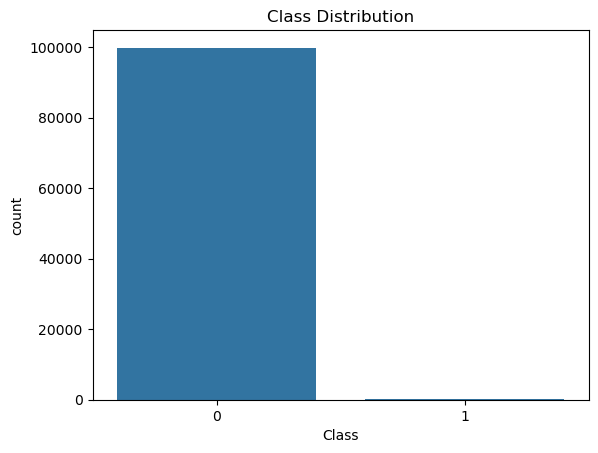

In [38]:
# Creating a count plot to visualize the distribution of the target variable ('Class') in the dataset
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')

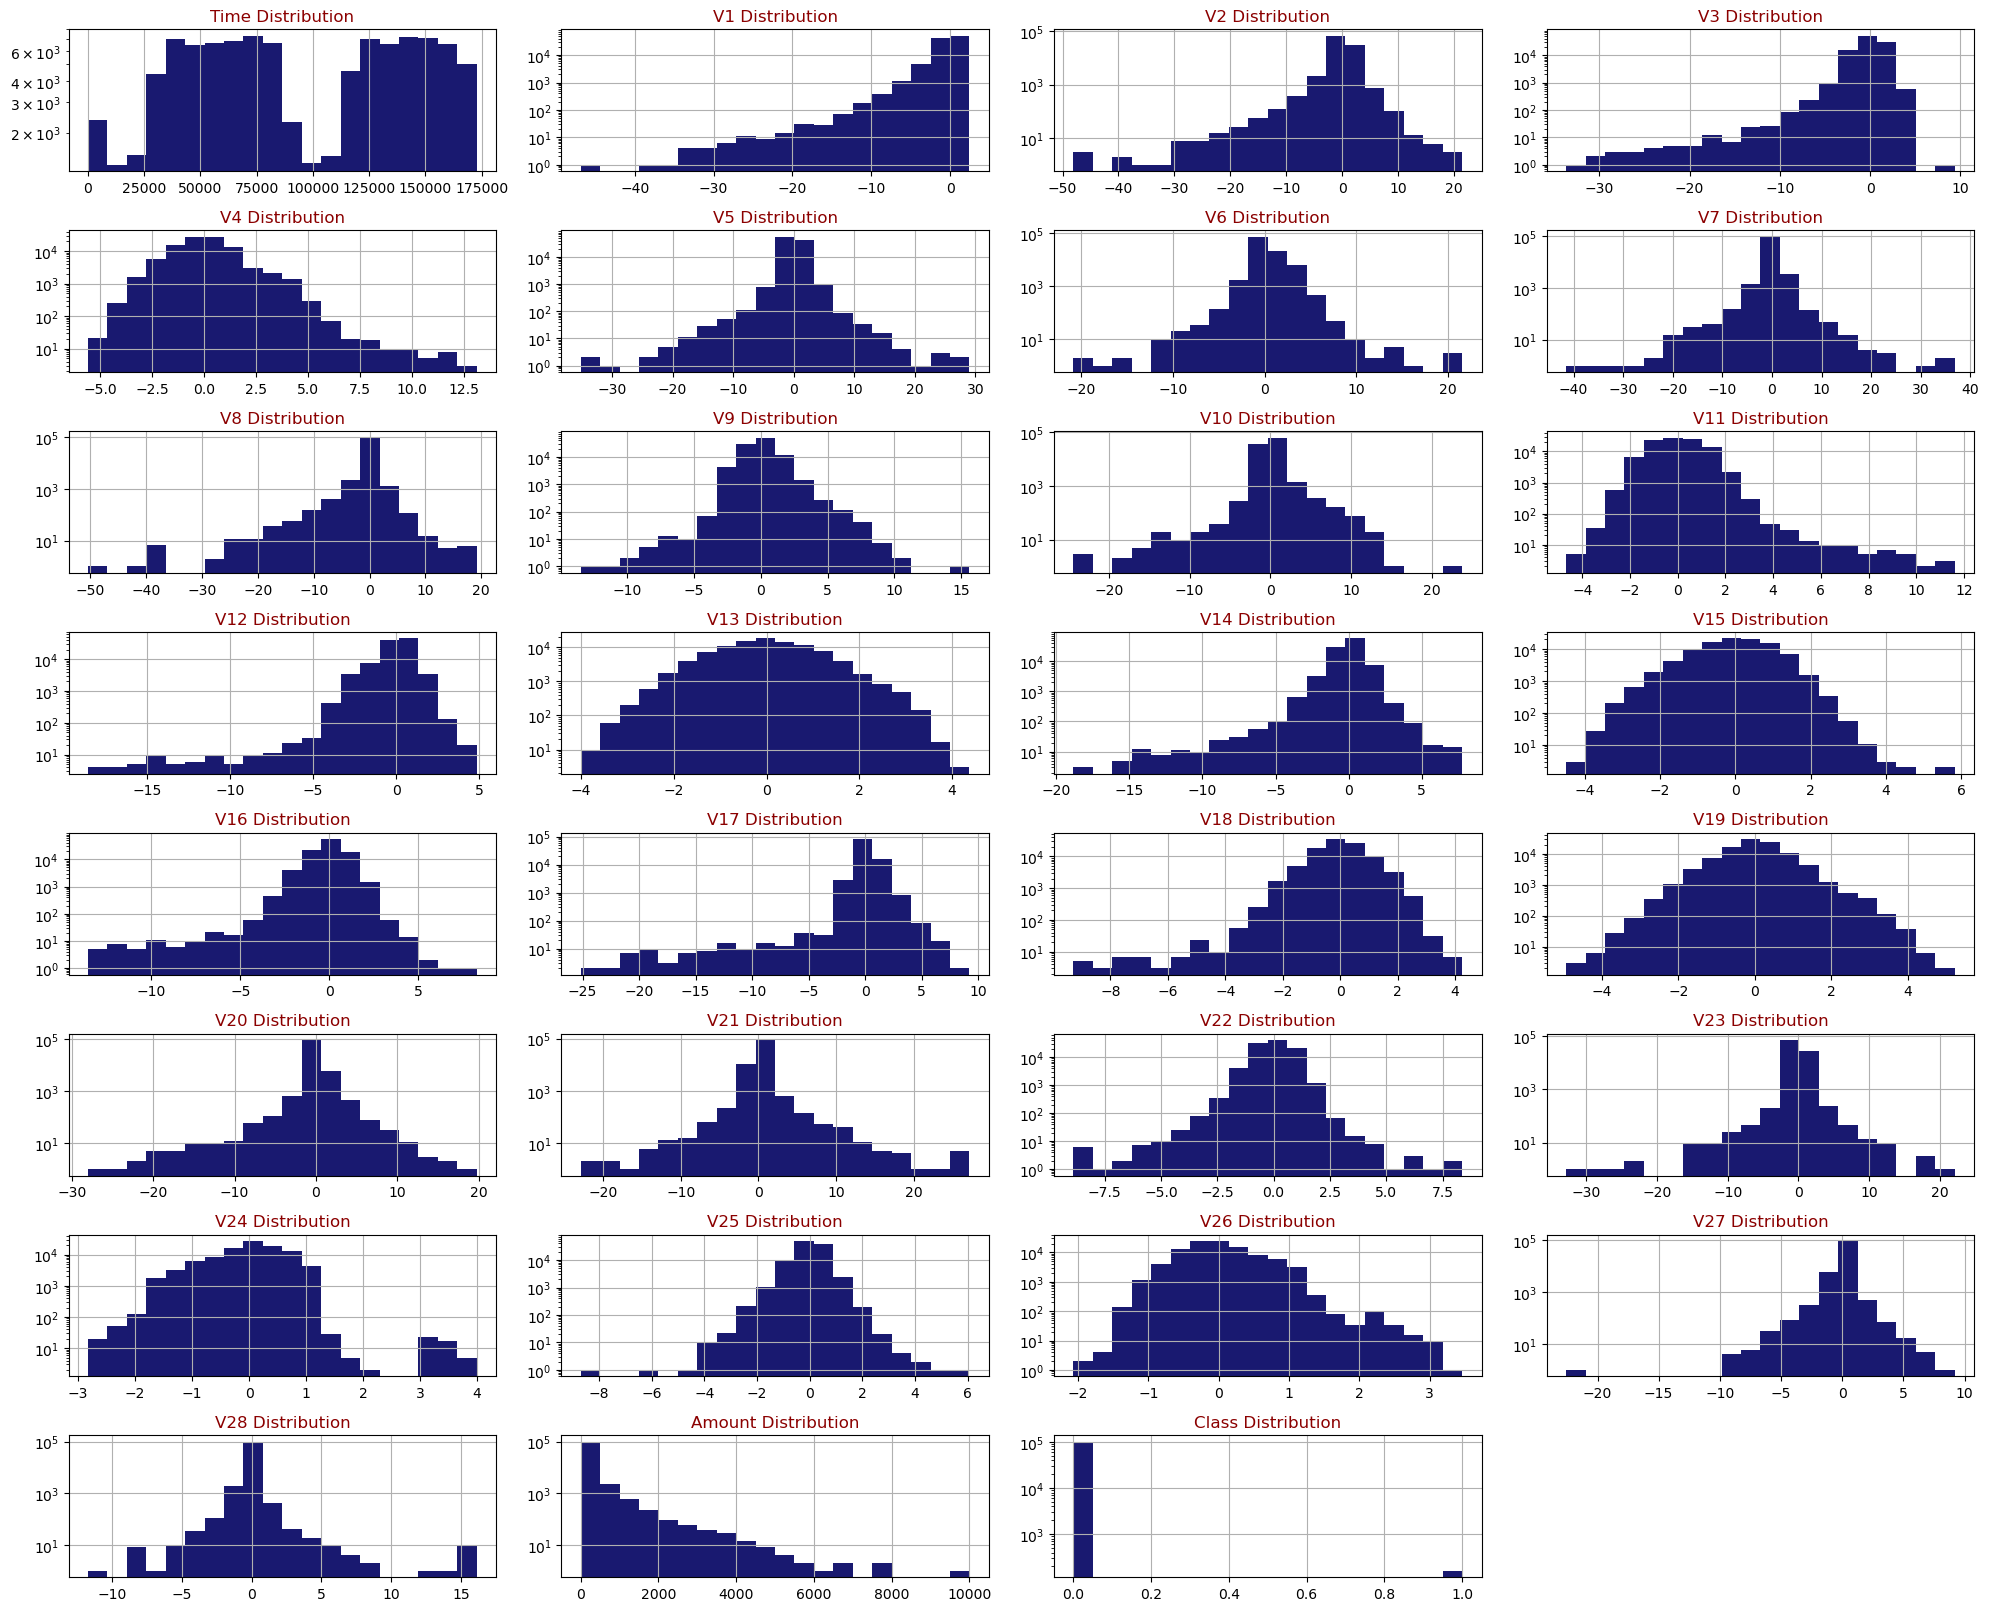

In [39]:
# Function to draw histograms for multiple features in a dataset
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,10,4)

Text(0.5, 1.0, 'Correlation Matrix')

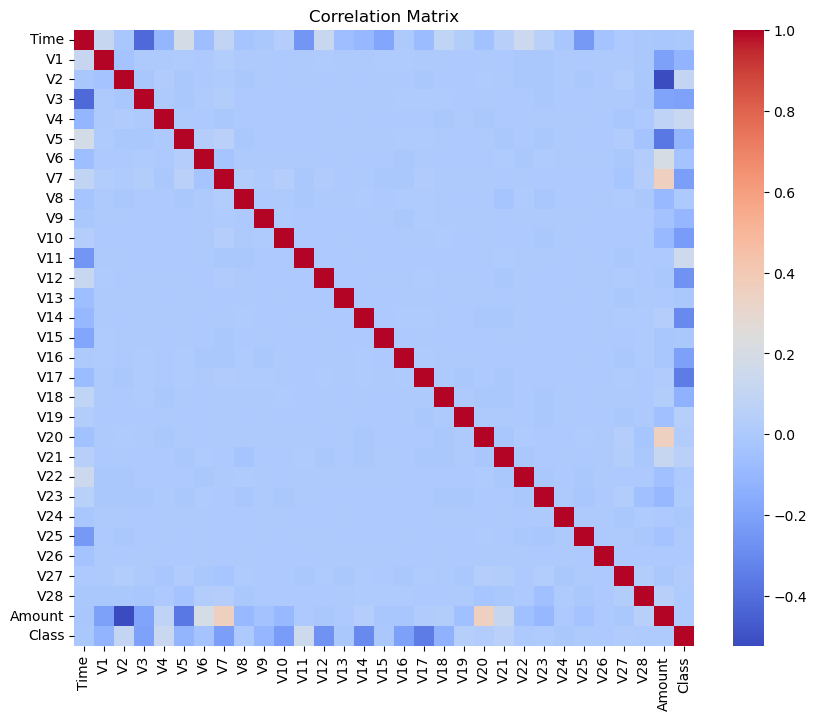

In [40]:
#Displaying Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')

In [41]:
# Separating features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the 'Amount' and 'Time' features
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19971
           1       0.90      0.90      0.90        29

    accuracy                           1.00     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       1.00      1.00      1.00     20000

AUC-ROC: 0.9647


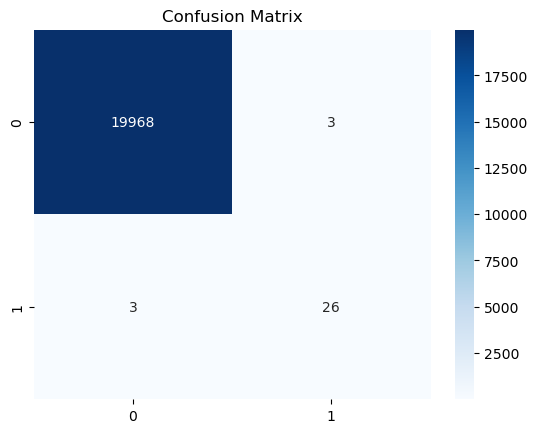

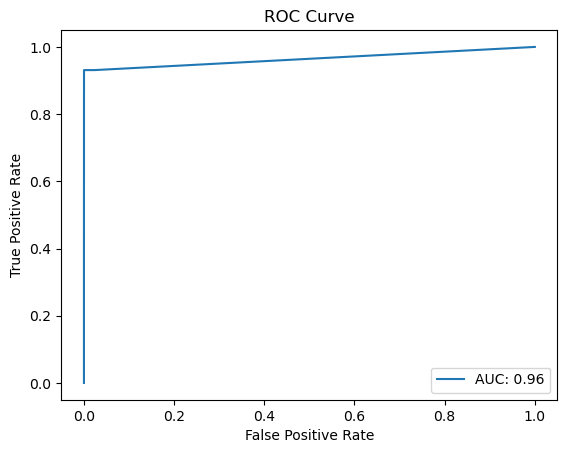

In [42]:
# Training a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Making Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_rf))

# Calculating the AUC-ROC score
auc = roc_auc_score(y_test, y_prob_rf)
print(f"AUC-ROC: {auc:.4f}")

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19971
           1       0.90      0.90      0.90        29

    accuracy                           1.00     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       1.00      1.00      1.00     20000

AUC-ROC: 0.9564


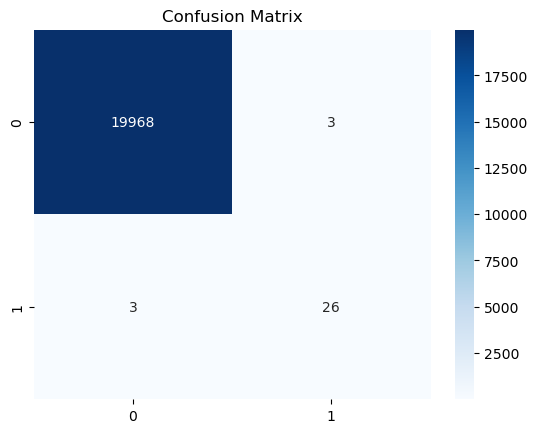

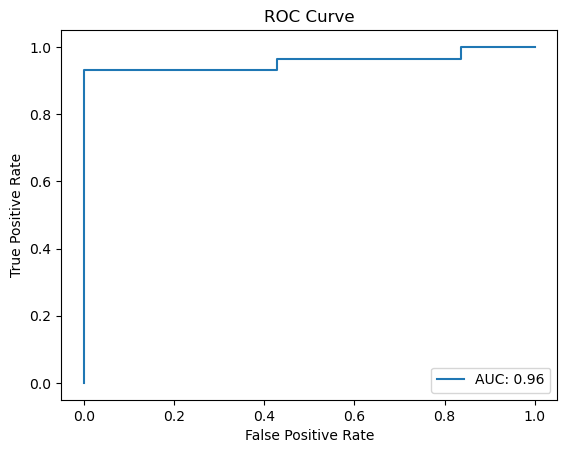

In [43]:
# Training a XGBOOST Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

#Making Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_xgb))

# Calculating the AUC-ROC score
auc = roc_auc_score(y_test, y_prob_xgb)
print(f"AUC-ROC: {auc:.4f}")

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Oversampling

In [44]:
# Importing the SMOTE (Synthetic Minority Over-sampling Technique) module from the imbalanced-learn library
from imblearn.over_sampling import SMOTE

In [45]:
# Applying SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance
X_res, y_res = SMOTE().fit_resample(X,y)

# Splitting the resampled data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)


========== XGBoost ===========

Accuracy: 0.9997
Precision: 0.9995
Recall: 1.0000
F1 Score: 0.9997
AUC-ROC: 1.0000


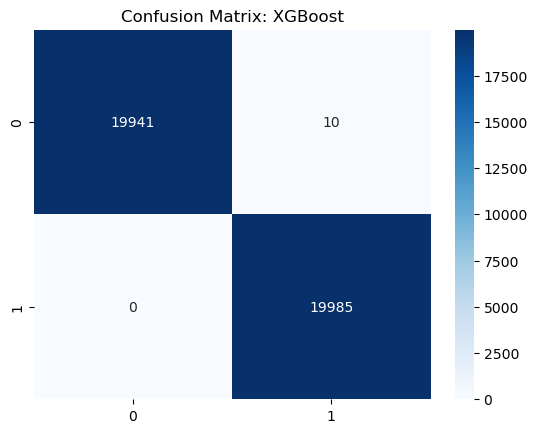

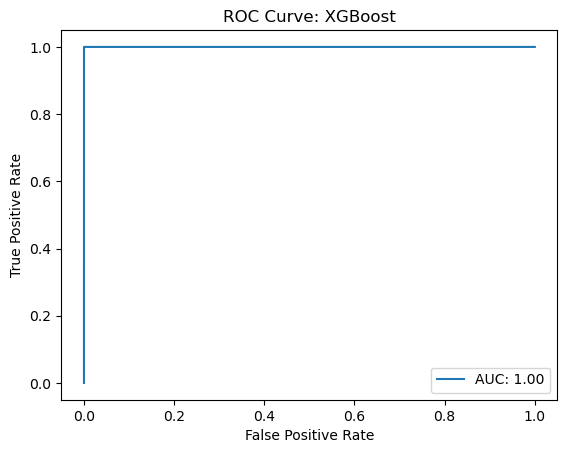


========== Random Forest Classifier ===========

Accuracy: 0.9998
Precision: 0.9995
Recall: 1.0000
F1 Score: 0.9998
AUC-ROC: 1.0000


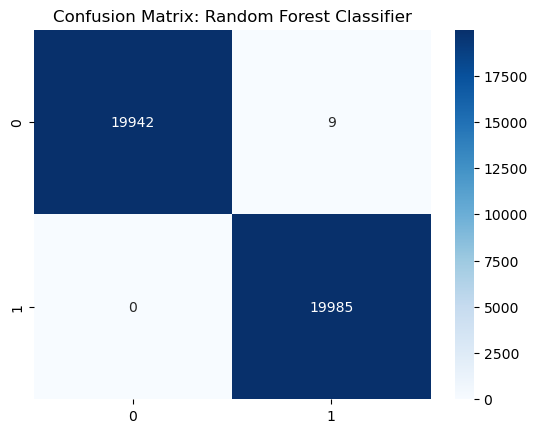

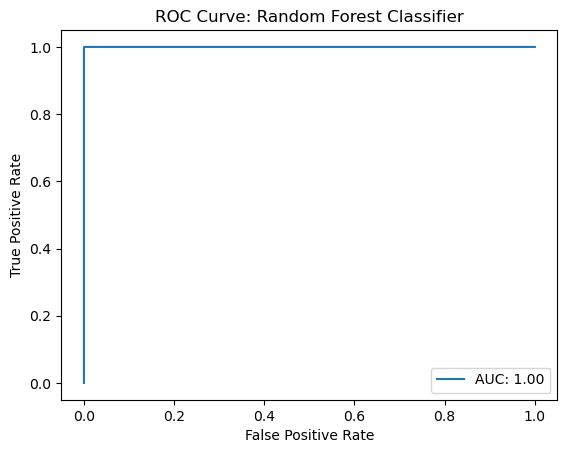

In [46]:
classifier = {
    "XGBoost": XGBClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f"\n========== {name} ===========")
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve (for binary classification)
    
    # Metrics
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    
    # AUC-ROC Score
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC: {auc:.4f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend(loc="lower right")
    plt.show()


Feature Importances:
   Feature  Importance
14     V14    0.272296
10     V10    0.154680
12     V12    0.095953
17     V17    0.090215
11     V11    0.084393
3       V3    0.067824
4       V4    0.058611
7       V7    0.025099
2       V2    0.022327
9       V9    0.021513
1       V1    0.015358
16     V16    0.012474
13     V13    0.007247
0     Time    0.006915
21     V21    0.006072
28     V28    0.005497
8       V8    0.005064
19     V19    0.004758
25     V25    0.004692
29  Amount    0.004316
20     V20    0.004303
22     V22    0.004147
15     V15    0.003928
6       V6    0.003891
27     V27    0.003607
24     V24    0.003515
18     V18    0.003501
26     V26    0.002883
23     V23    0.002603
5       V5    0.002320


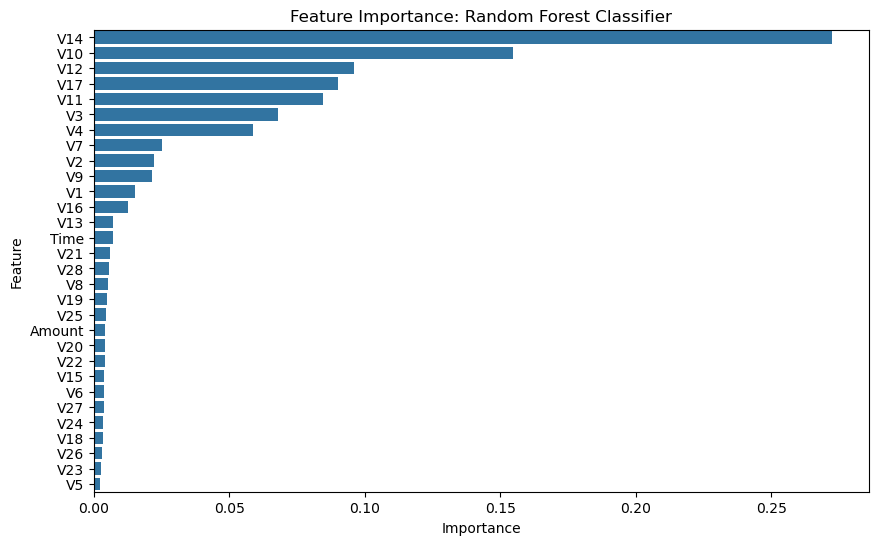

In [47]:
# Feature Importance for RandomForestClassifier
if "Random Forest Classifier" in classifier:
    clf = classifier["Random Forest Classifier"]
    feature_importances = clf.feature_importances_
    
    # X_train is a DataFrame with column names
    features = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(len(feature_importances))]
    feature_importance_df = pd.DataFrame({
        "Feature": features,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

    print("\nFeature Importances:")
    print(feature_importance_df)

    # Plot Feature Importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
    plt.title('Feature Importance: Random Forest Classifier')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Random Forest Classifier not found in the classifier dictionary.")


In [48]:
# Selecting the top 8 features based on feature importance
top_features = ['V14', 'V4', 'V12', 'V10', 'V17', 'V11', 'V3']

# Separating features and target variable
X = df[top_features]
y = df['Class']

# Applying SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)

# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


========== Random Forest Classifier ===========

Accuracy: 0.9995
Precision: 0.9992
Recall: 0.9998
F1 Score: 0.9995
AUC-ROC: 1.0000


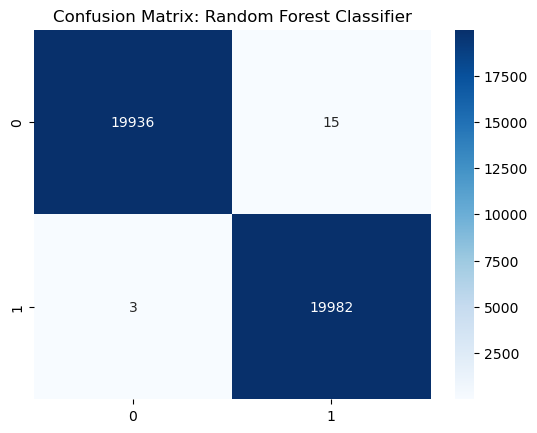

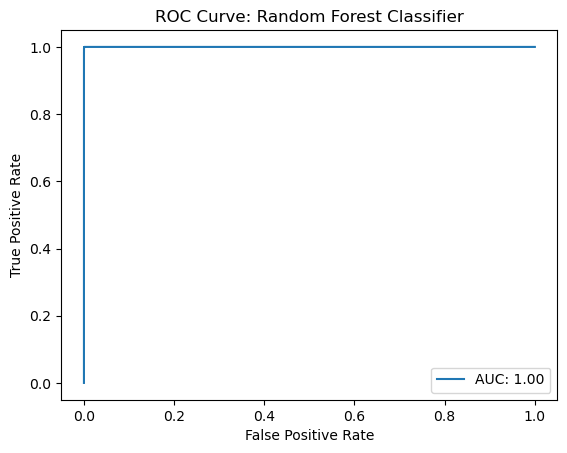

In [49]:
# Define the classifier
classifier = {"Random Forest Classifier": RandomForestClassifier(random_state=42)}

# Loop through classifiers (only one in this case)
for name, clf in classifier.items():
    print(f"\n========== {name} ===========")
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve (binary classification)

    # Metrics
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    
    # AUC-ROC Score
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC: {auc:.4f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend(loc="lower right")
    plt.show()

In [50]:
from joblib import dump
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are already defined and preprocessed
# Select the best model
best_model = RandomForestClassifier()

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Save the best model to a file
dump(best_model, 'credit_card_fraud_model.pkl')

print("Random Forest Classifier model has been saved as 'credit_card_fraud_model.pkl'")


Random Forest Classifier model has been saved as 'credit_card_fraud_model.pkl'


In [51]:
# Create the file Financial_Inclusion_Prediction_Streamlit_App.py in write mode
with open("Credit_Card_Fraud_Detection.py", "w") as file:
    # Writing the Streamlit code into the file
    file.write("""

# Import necessary libraries
import streamlit as st
import pandas as pd
import joblib


# Title for the web app
st.title('Credit Card Fraud Detection')

# Load the trained model
model = joblib.load("credit_card_model.pkl")  

# Input features from the user
st.header('Input Features')

# Feature sliders with appropriate ranges based on your dataset
v11 = st.slider('V11', min_value=-20.0, max_value=20.0, value=0.0, step=0.1)
v4 = st.slider('V4', min_value=-20.0, max_value=20.0, value=0.0, step=0.1)
v2 = st.slider('V2', min_value=-20.0, max_value=20.0, value=0.0, step=0.1)
v17 = st.slider('V17', min_value=-20.0, max_value=20.0, value=0.0, step=0.1)
v14 = st.slider('V14', min_value=-20.0, max_value=20.0, value=0.0, step=0.1)
v12 = st.slider('V12', min_value=-20.0, max_value=20.0, value=0.0, step=0.1)
v10 = st.slider('V10', min_value=-20.0, max_value=20.0, value=0.0, step=0.1)

# Create a dictionary for the model input
input_data = {
    'V11': [v11],
    'V4': [v4],
    'V3': [v3],
    'V17': [v17],
    'V14': [v14],
    'V12': [v12],
    'V10': [v10]
}


# Convert input data to dataframe
input_df = pd.DataFrame(input_data)

# Display the input data
st.subheader('Input Data')
st.write(input_df)

# Prediction
if st.button('Predict'):
    prediction = model.predict(input_df)
    prediction_prob = model.predict_proba(input_df)
    
if prediction[0] == 1: 
    st.success(f"The model predicts that this is a Fraud {prediction_prob[0][1] * 100:.2f}% probability.")
else:
    st.error(f"The model predicts that this is not a fraud {prediction_prob[0][0] * 100:.2f}% probability.")

""")